# 7장

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/math4ds/blob/main/ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

예제 7-1

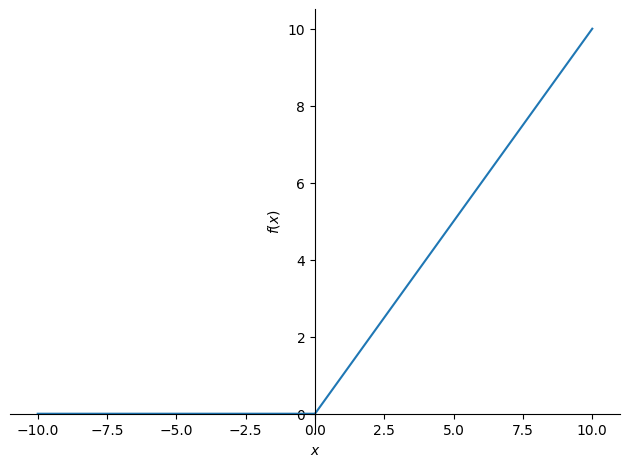

In [1]:
from sympy import *

# 렐루 함수 그리기
x = symbols('x')
relu = Max(0, x)
plot(relu)

예제 7-2

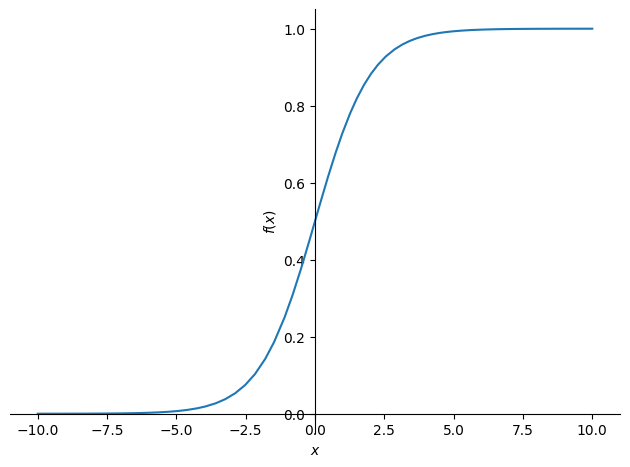

In [2]:
from sympy import *

# 로지스틱 그래프 그리기
x = symbols('x')
logistic = 1 / (1 + exp(-x))
plot(logistic)

예제 7-3

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("https://tinyurl.com/y2qmhfsr")

# 입력 값을 추출하여 255로 나눕니다
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values

# 훈련 데이터와 테스트 데이터로 분할합니다
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs,
    test_size=1/3)
n = X_train.shape[0] # 훈련 샘플 개수

# 신경망의 가중치와 편향을 랜덤하게 초기화합니다
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)

b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# 활성화 함수
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# 입력을 신경망에 통과시키고 출력을 얻습니다
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# 정확도를 계산합니다
test_predictions = forward_prop(X_test.transpose())[3] # grab only output layer, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("정확도: ", accuracy)

정확도:  0.5991091314031175


예제 7-8

In [5]:
from sympy import *

Z2 = symbols('Z2')

logistic = lambda x: 1 / (1 + exp(-x))

A2 = logistic(Z2)
dA2_dZ2 = diff(A2, Z2)
print(dA2_dZ2)

exp(-Z2)/(1 + exp(-Z2))**2


예제 7-9

In [6]:
from sympy import *

A1, W2, B2 = symbols('A1, W2, B2')

Z2 = A1*W2 + B2
dZ2_dW2 = diff(Z2, W2)
print(dZ2_dW2)

A1


예제 7-10

In [7]:
from sympy import *

W1, W2, B1, B2, A1, A2, Z1, Z2, X, Y = \
    symbols('W1 W2 B1 B2 A1 A2 Z1 Z2 X Y')

# A2에 대한 비용 함수의 도함수
C = (A2 - Y)**2
dC_dA2 = diff(C, A2)
print("dC_dA2 = ", dC_dA2) # 2*A2 - 2*Y

# Z2에 대한 A2의 도함수
logistic = lambda x: 1 / (1 + exp(-x))
_A2 = logistic(Z2)
dA2_dZ2 = diff(_A2, Z2)
print("dA2_dZ2 = ", dA2_dZ2) # exp(-Z2)/(1 + exp(-Z2))**2

# A1에 대한 Z2의 도함수
_Z2 = A1*W2 + B2
dZ2_dA1 = diff(_Z2, A1)
print("dZ2_dA1 = ", dZ2_dA1) # W2

# W2에 대한 Z2의 도함수
dZ2_dW2 = diff(_Z2, W2)
print("dZ2_dW2 = ", dZ2_dW2) # A1

# B2에 대한 Z2의 도함수
dZ2_dB2 = diff(_Z2, B2)
print("dZ2_dB2 = ", dZ2_dB2) # 1

# Z1에 대한 A1의 도함수
relu = lambda x: Max(x, 0)
_A1 = relu(Z1)

d_relu = lambda x: x > 0 # 양수이면 기울기가 1, 그렇지 않으면 0
dA1_dZ1 = d_relu(Z1)
print("dA1_dZ1 = ", dA1_dZ1) # Z1 > 0

# W1에 대한 Z1의 도함수
_Z1 = X*W1 + B1
dZ1_dW1 = diff(_Z1, W1)
print("dZ1_dW1 = ", dZ1_dW1) # X

# B1에 대한 Z1의 도함수
dZ1_dB1 = diff(_Z1, B1)
print("dZ1_dB1 = ", dZ1_dB1) # 1

dC_dA2 =  2*A2 - 2*Y
dA2_dZ2 =  exp(-Z2)/(1 + exp(-Z2))**2
dZ2_dA1 =  W2
dZ2_dW2 =  A1
dZ2_dB2 =  1
dA1_dZ1 =  Z1 > 0
dZ1_dW1 =  X
dZ1_dB1 =  1


예제 7-11

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("https://tinyurl.com/y2qmhfsr")

# 학습률은 솔루션에 얼마나 느리게 도착할지 제어합니다
# 너무 작으면 오랜 시간이 걸립니다
# 너무 크면 솔루션을 지나치거나 놓칩니다
L = 0.05

# 입력 열을 추출해 255로 나눕니다
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values

# 훈련 데이터셋과 테스트 데이터셋으로 나눕니다
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs,
    test_size=1 / 3)
n = X_train.shape[0]


# 랜덤하게 초기화한 가중치와 편향으로 신경망을 만듭니다
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)

b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# 활성화 함수
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# 입력을 신경망에 통과시키고 예측 출력을 얻습니다
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# 활성화 함수의 도함수
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# 연쇄 법칙을 사용해 가중치와 편향의 그레이디언트를 반환합니다
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# 경사 하강법을 실행합니다
for i in range(100_000):
    # 훈련 데이터에서 하나의 샘플을 랜덤하게 선택합니다
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # 선택한 샘플을 신경망에 통과시킵니다
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # 역전파를 통해 오차를 전파하고 가중치와 편향에 대한 그레이디언트를 얻습니다
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # 가중치와 편향을 업데이트합니다
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

# 정확도를 계산합니다
test_predictions = forward_prop(X_test.transpose())[3]  # A2만 저장합니다
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("정확도: ", accuracy)

정확도:  0.9777282850779437


예제 7-12

In [9]:
# 새로운 색깔을 테스트하기
def predict_probability(r, g, b):
    X = np.array([[r, g, b]]).transpose() / 255
    Z1, A1, Z2, A2 = forward_prop(X)
    return A2

def predict_font_shade(r, g, b):
    output_values = predict_probability(r, g, b)
    if output_values > .5:
        return "DARK"
    else:
        return "LIGHT"

col_input = input("밝은 글꼴과 어두운 글꼴을 예측합니다. R,G,B를 입력하세요: ")
(r, g, b) = col_input.split(",")
print(predict_font_shade(int(r), int(g), int(b)))

밝은 글꼴과 어두운 글꼴을 예측합니다. R,G,B를 입력하세요:  255,255,255


DARK
